In [ ]:
from utils import *
x = np.linspace(-1, 1, 500)
t = np.linspace(0, 1, 2000)

def u0_burgers(x):
    return -np.sin(np.pi*x)

def u0_riemann(x):
    return np.where(x < 0, 1.0, 0.0)

u0_1 = u0_burgers(x)
u0_2 = u0_riemann(x)

In [2]:
arch_list = [
    [2,5,1],
    [2,20,20,1],
    [2,50,50,1],
    [2,50,50,50,1],
    [2,100,100,1]
]

for k, u in enumerate((u0_1, u0_2)):
    for i, layers in enumerate(arch_list):
        ps = wPINN(
            u0=u,
            x=x,
            t=t,
            layers=layers,
            epochs=20000,
            bc_type='dirichlet',
            path=f'trained_models/Conv_anal_time/u_0_{i+1}/Conv_Anal_time_Final_wpinn_burgers_{k+1}_{i+1}_20000'
        )

        print(f"\n=== Test #{i} | layers={layers}, epochs={ps.epochs}")

        ps.Train(store_times=True)



=== Test #0 | layers=[2, 5, 1], epochs=20000


c:\Users\frmar\OneDrive\Desktop\GitHub\PINNs\PINNs\Lib\site-packages\torch\autograd\graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


KeyboardInterrupt: 

In [ ]:
arch_list   = [[2,5,1], [2,20,20,1], [2,50,50,1], [2,50,50,50,1], [2,100,100,1]]

for k, u in enumerate((u0_1, u0_2)):
    for i in range(len(arch_list)):
            path = f'trained_models/Conv_anal_time/u_2_{i}/Conv_Anal_time_Final_wpinn_burgers_{k+1}_{i+1}_20000'
            ps = ProblemSetUp(
                u0=u0_1, x=x, t=t,
                layers=arch_list[i],
                epochs=20000,
                nu=0,
                equation='burgers',
                model='wpinn',
                bc_type='dirichlet',
                auto_train=False,
                path=path
            )

            print(f"\n=== Test #{i} | layers={arch_list[i][1:-1]}, epochs=20000")
            # ps.plot()
            # ps.plot_losses(window=200)
            # ps.plot_comparison()
            ps.l2_error()


=== Test #100 | layers=[5], epochs=100

Metriche di Errore L2
---------------------
Errore L2 assoluto            : 1.169162e+00
Errore L2 relativo            : 1.045682e+00


=== Test #250 | layers=[5], epochs=250

Metriche di Errore L2
---------------------
Errore L2 assoluto            : 7.209551e-01
Errore L2 relativo            : 6.448123e-01


=== Test #500 | layers=[5], epochs=500

Metriche di Errore L2
---------------------
Errore L2 assoluto            : 3.968043e-01
Errore L2 relativo            : 3.548964e-01


=== Test #1000 | layers=[5], epochs=1000

Metriche di Errore L2
---------------------
Errore L2 assoluto            : 3.655697e-01
Errore L2 relativo            : 3.269605e-01


=== Test #2000 | layers=[5], epochs=2000

Metriche di Errore L2
---------------------
Errore L2 assoluto            : 3.506763e-01
Errore L2 relativo            : 3.136400e-01


=== Test #3000 | layers=[5], epochs=3000

Metriche di Errore L2
---------------------
Errore L2 assoluto           

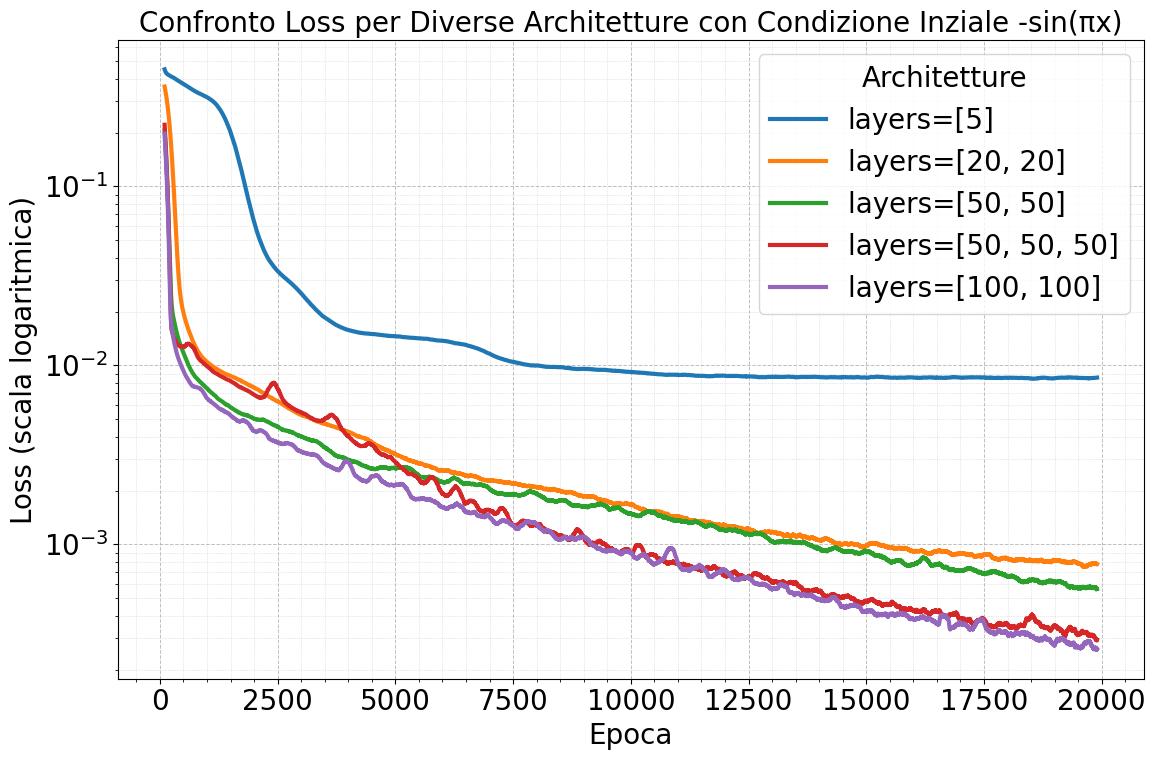

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Funzione di smoothing con media mobile
def smooth(y, window=200):
    kernel = np.ones(window) / window
    return np.convolve(y, kernel, mode='valid')

# Configurazione
arch_list   = [[2,5,1], [2,20,20,1], [2,50,50,1], [2,50,50,50,1], [2,100,100,1]]
epochs      = 20000
k           = 0  # scegli 0 o 1
base_dir    = "trained_models/Conv_Anal"

# Imposto font enormi
plt.rcParams.update({
    'font.size':           20,
    'axes.titlesize':      20,
    'axes.labelsize':      20,
    'xtick.labelsize':     20,
    'ytick.labelsize':     20,
    'legend.fontsize':     20,
    'legend.title_fontsize':20
})

# Colormap
cmap = plt.get_cmap('tab10')


plt.figure(figsize=(12, 8))
for i, arch in enumerate(arch_list):
    loss_path = os.path.join(
        base_dir,
        f"u_{1}_{i}",
        f"Conv_Anal_Final_wpinn_burgers_0_{i+1}_{epochs}_losses.npy"
    )
    if not os.path.isfile(loss_path):
        continue

    losses     = np.load(loss_path)
    total_loss = losses[:, -1]
    y_smooth   = smooth(total_loss, window=200)
    x_axis     = np.arange(len(y_smooth)) + 200//2  # centro della finestra

    plt.semilogy(
        x_axis, y_smooth,
        label=f"layers={arch[1:-1]}",
        color=cmap(i),
        linewidth=3
    )
    plt.xlabel("Epoca")
plt.ylabel("Loss (scala logaritmica)")
plt.title(f"Confronto Loss per Diverse Architetture con Condizione Inziale -sin(πx)")
plt.grid(which="major", linestyle="--", linewidth=0.7, alpha=0.8)
plt.grid(which="minor", linestyle=":", linewidth=0.5, alpha=0.6)
plt.minorticks_on()
plt.legend(title="Architetture", loc="upper right")
plt.tight_layout()
plt.show()




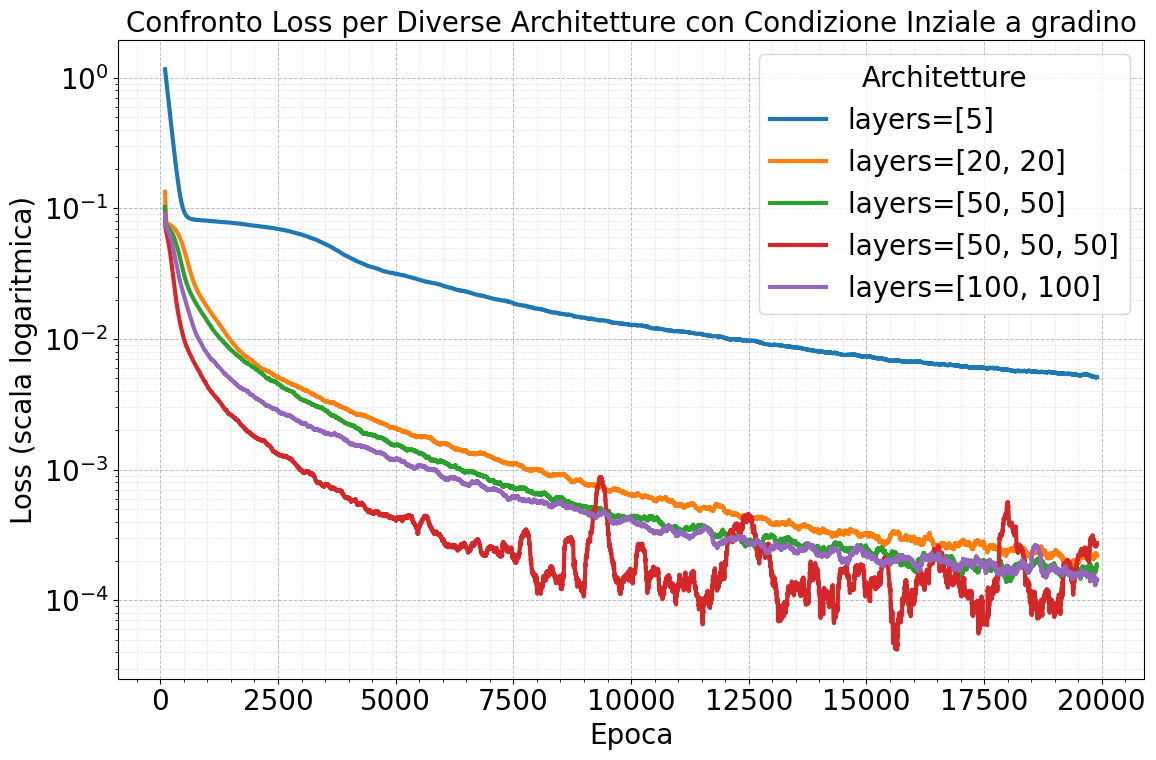

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Funzione di smoothing con media mobile
def smooth(y, window=200):
    kernel = np.ones(window) / window
    return np.convolve(y, kernel, mode='valid')

# Configurazione
arch_list   = [[2,5,1], [2,20,20,1], [2,50,50,1], [2,50,50,50,1], [2,100,100,1]]
epochs      = 20000
k           = 0  # scegli 0 o 1
base_dir    = "trained_models/Conv_Anal"

# Imposto font enormi
plt.rcParams.update({
    'font.size':           20,
    'axes.titlesize':      20,
    'axes.labelsize':      20,
    'xtick.labelsize':     20,
    'ytick.labelsize':     20,
    'legend.fontsize':     20,
    'legend.title_fontsize':20
})

# Colormap
cmap = plt.get_cmap('tab10')


plt.figure(figsize=(12, 8))
for i, arch in enumerate(arch_list):
    loss_path = os.path.join(
        base_dir,
        f"u_2_{i}",
        f"Conv_Anal_Final_wpinn_burgers_1_{i+1}_{epochs}_losses.npy"
    )
    if not os.path.isfile(loss_path):
        continue

    losses     = np.load(loss_path)
    total_loss = losses[:, -1]
    y_smooth   = smooth(total_loss, window=200)
    x_axis     = np.arange(len(y_smooth)) + 200//2  # centro della finestra

    plt.semilogy(
        x_axis, y_smooth,
        label=f"layers={arch[1:-1]}",
        color=cmap(i),
        linewidth=3
    )
    plt.xlabel("Epoca")
plt.ylabel("Loss (scala logaritmica)")
plt.title(f"Confronto Loss per Diverse Architetture con Condizione Inziale a gradino")
plt.grid(which="major", linestyle="--", linewidth=0.7, alpha=0.8)
plt.grid(which="minor", linestyle=":", linewidth=0.5, alpha=0.6)
plt.minorticks_on()
plt.legend(title="Architetture", loc="upper right")
plt.tight_layout()
plt.show()


